In [ ]:
from IPython.display import display, Markdown
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

# Manufacture

In [ ]:
manu = pd.ExcelFile("Manufacturing_filled.xlsx")
service = pd.ExcelFile("Service_filled.xlsx")
manu_name = manu.sheet_names
ser_name = service.sheet_names

In [ ]:
manu_name
Country_code=["CHN","GBR","HKG","IND","IRN","ITA","RUS","USA","VNM","ZAF"]
method_dict = {"Mean": [], "Median": [], "LOCF": [], "NOCB" :[],"Rolling":[], "Interpolate":[]}

for name in manu_name:
  country = name.split(" ")[0]
  method = name.split(" ")[1]
  df = pd.read_excel("Manufacturing_filled.xlsx", sheet_name = name)
  method_dict[method].append(df)



## India

Time range: 1980-2021

In [ ]:
df = method_dict["NOCB"][3]
df

,Year,Logistic_performance,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,New_business_density,Manufacturing_value added_%_of_GDP
0,1980,3.070000,366.000000,2450656.0,273520.0,4.720785e+10,266.577851,1.630310e+11,46.6,0.067923,16.752376
1,1981,3.070000,411.399994,2450656.0,273520.0,5.050670e+10,270.470601,1.659542e+11,46.6,0.067923,16.770444
2,1982,3.070000,409.899994,2450656.0,273520.0,5.248662e+10,274.111334,1.712490e+11,46.6,0.067923,16.369996
3,1983,3.070000,461.600006,2450656.0,273520.0,5.740045e+10,291.238110,1.869108e+11,46.6,0.067923,16.664455
4,1984,3.070000,545.500000,2450656.0,273520.0,5.672928e+10,276.667958,1.802508e+11,46.6,0.067923,16.707804
5,1985,3.070000,489.700012,2450656.0,273520.0,6.191575e+10,296.435150,1.950986e+11,46.6,0.067923,16.418013
6,1986,3.070000,539.700012,2450656.0,273520.0,6.655604e+10,310.465933,2.109145e+11,46.6,0.067923,16.221584
7,1987,3.070000,645.200012,2450656.0,273520.0,7.449984e+10,340.416835,2.326543e+11,46.6,0.067923,16.209549
8,1988,3.070000,646.299988,2450656.0,273520.0,7.922362e+10,354.149248,2.423841e+11,46.6,0.067923,16.101535
9,1989,3.070000,680.599976,2450656.0,273520.0,8.156261e+10,346.112888,2.360498e+11,46.6,0.067923,16.902846


### Missing value imputation

Using NOCB together with LOCF

In [ ]:
# using last/next point to fill missing 
cols = df.columns
for j in cols:
  for i in range(0, len(df)):
    if pd.isnull(df[j][i]):
      df[j][i] = df[j][i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,Year,Logistic_performance,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,New_business_density,Manufacturing_value added_%_of_GDP
0,1980,3.070000,366.000000,2450656.0,273520.0,4.720785e+10,266.577851,1.630310e+11,46.6,0.067923,16.752376
1,1981,3.070000,411.399994,2450656.0,273520.0,5.050670e+10,270.470601,1.659542e+11,46.6,0.067923,16.770444
2,1982,3.070000,409.899994,2450656.0,273520.0,5.248662e+10,274.111334,1.712490e+11,46.6,0.067923,16.369996
3,1983,3.070000,461.600006,2450656.0,273520.0,5.740045e+10,291.238110,1.869108e+11,46.6,0.067923,16.664455
4,1984,3.070000,545.500000,2450656.0,273520.0,5.672928e+10,276.667958,1.802508e+11,46.6,0.067923,16.707804
5,1985,3.070000,489.700012,2450656.0,273520.0,6.191575e+10,296.435150,1.950986e+11,46.6,0.067923,16.418013
6,1986,3.070000,539.700012,2450656.0,273520.0,6.655604e+10,310.465933,2.109145e+11,46.6,0.067923,16.221584
7,1987,3.070000,645.200012,2450656.0,273520.0,7.449984e+10,340.416835,2.326543e+11,46.6,0.067923,16.209549
8,1988,3.070000,646.299988,2450656.0,273520.0,7.922362e+10,354.149248,2.423841e+11,46.6,0.067923,16.101535
9,1989,3.070000,680.599976,2450656.0,273520.0,8.156261e+10,346.112888,2.360498e+11,46.6,0.067923,16.902846


In [ ]:
def report(df):
    display(Markdown('<b>head():</b>'))
    display(df.head())
    display(Markdown('<b>describe():</b>'))
    display(df.describe())
    display(Markdown('<b>info():</b>'))
    display(df.info(verbose=True))
    display(Markdown('<b>infer_dtype():</b>'))
    display(df.apply(lambda x: pd.api.types.infer_dtype(x.values)))

In [ ]:
report(df)

<b>head():</b>

,Year,Logistic_performance,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,New_business_density,Manufacturing_value added_%_of_GDP
0,1980,3.07,366.000000,2450656.0,273520.0,4.720785e+10,266.577851,1.630310e+11,46.6,0.067923,16.752376
1,1981,3.07,411.399994,2450656.0,273520.0,5.050670e+10,270.470601,1.659542e+11,46.6,0.067923,16.770444
2,1982,3.07,409.899994,2450656.0,273520.0,5.248662e+10,274.111334,1.712490e+11,46.6,0.067923,16.369996
3,1983,3.07,461.600006,2450656.0,273520.0,5.740045e+10,291.238110,1.869108e+11,46.6,0.067923,16.664455
4,1984,3.07,545.500000,2450656.0,273520.0,5.672928e+10,276.667958,1.802508e+11,46.6,0.067923,16.707804


<b>describe():</b>

,Year,Logistic_performance,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,New_business_density,Manufacturing_value added_%_of_GDP
count,42.000000,42.000000,42.000000,4.200000e+01,42.000000,4.200000e+01,42.000000,4.200000e+01,42.000000,42.000000,42.000000
mean,2000.500000,3.104294,940.547878,6.110390e+06,422790.595238,2.746749e+11,828.088132,7.052606e+11,40.778571,0.084157,16.012440
std,12.267844,0.080254,612.773791,4.946009e+06,167875.588879,2.438637e+11,636.179383,6.302825e+11,7.904939,0.026278,0.968003
min,1980.000000,3.070000,366.000000,2.450656e+06,273520.000000,4.720785e+10,266.577851,1.630310e+11,30.300000,0.067923,13.473618
25%,1990.250000,3.070000,531.225006,2.450656e+06,273520.000000,7.772011e+10,341.838364,2.335032e+11,30.300000,0.067923,15.564990
50%,2000.500000,3.070000,650.100006,2.607706e+06,322800.000000,1.282877e+11,447.443596,3.615016e+11,46.600000,0.067923,16.037276
75%,2010.750000,3.080137,1234.852750,9.642734e+06,624336.000000,5.242586e+11,1422.302758,1.195427e+12,46.600000,0.093006,16.741233
max,2021.000000,3.420043,2703.964174,1.705320e+07,681696.000000,8.210151e+11,2277.434347,2.242837e+12,46.600000,0.152973,17.865851


<b>info():</b>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 42 non-null     int64  
 1   Logistic_performance                 42 non-null     float64
 2   Air_freight_million_ton_km           42 non-null     float64
 3   Container_port_traffic_TEU           42 non-null     float64
 4   Railways_goods_trans_million_ton-km  42 non-null     float64
 5   Industry_value_added_current_USD     42 non-null     float64
 6   GDP_per_capita_current_USD           42 non-null     float64
 7   Final_consumption                    42 non-null     float64
 8   Access_finance                       42 non-null     float64
 9   New_business_density                 42 non-null     float64
 10  Manufacturing_value added_%_of_GDP   42 non-null     float64
dtypes: float64(10), int64(1)
memory us

None

<b>infer_dtype():</b>

Year                                    integer
Logistic_performance                   floating
Air_freight_million_ton_km             floating
Container_port_traffic_TEU             floating
Railways_goods_trans_million_ton-km    floating
Industry_value_added_current_USD       floating
GDP_per_capita_current_USD             floating
Final_consumption                      floating
Access_finance                         floating
New_business_density                   floating
Manufacturing_value added_%_of_GDP     floating
dtype: object

### Visualize time series

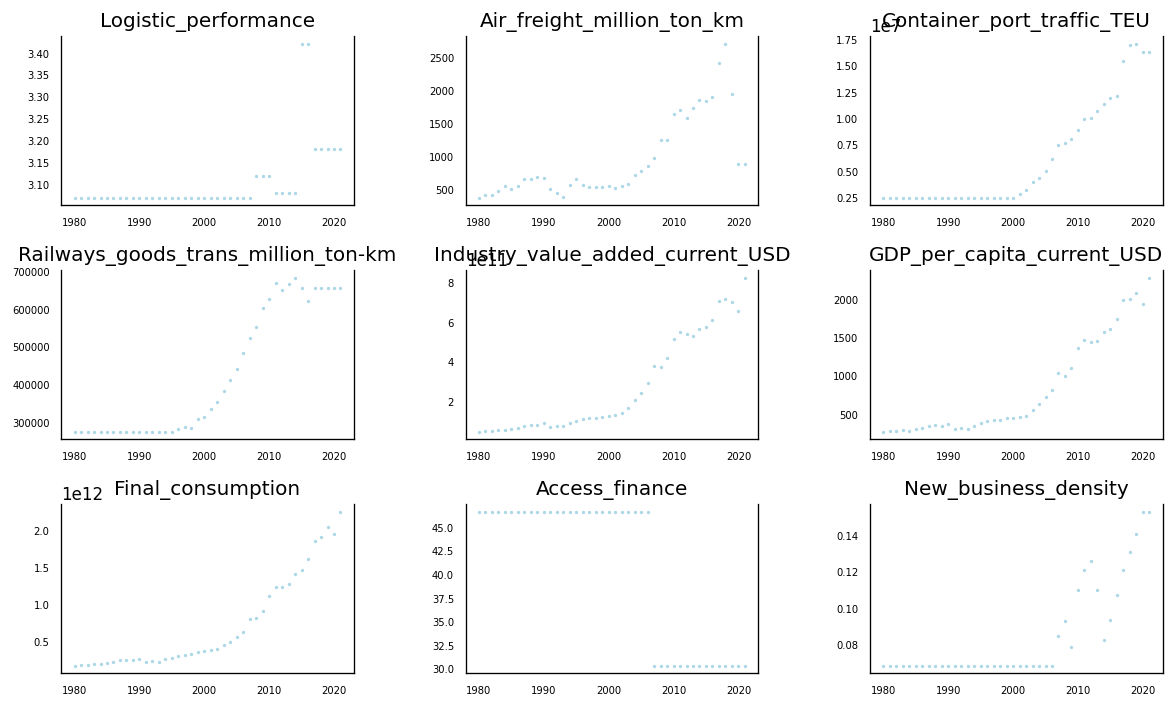

In [ ]:
# Plot
def plot_time_series(df, nrow, ncol):
  fig, axes = plt.subplots(nrow, ncol, dpi=120, figsize=(10,6))
  for i, ax in enumerate(axes.flatten()):
      data = df[df.columns[i+1]]
      ax.plot(df[df.columns[0]],data, 'o', color = "lightblue",ms = 1)
      # Decorations
      ax.set_title(df.columns[i+1])
      ax.xaxis.set_ticks_position('none')
      ax.yaxis.set_ticks_position('none')
      ax.spines["top"].set_alpha(0)
      ax.tick_params(labelsize=6)

  plt.tight_layout()
plot_time_series(df,3,3)

### ADF Test

In [ ]:
df_test = df.drop(['Year'],axis = 1)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Cannot reject Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [ ]:
for name, column in df_test.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Logistic_performance" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.6736
 No. Lags Chosen       = 10
 Critical value 1%     = -3.661
 Critical value 5%     = -2.961
 Critical value 10%    = -2.619
 => P-Value = 0.9981. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Air_freight_million_ton_km" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.6743
 No. Lags Chosen       = 2
 Critical value 1%     = -3.61
 Critical value 5%     = -2.939
 Critical value 10%    = -2.608
 => P-Value = 0.8533. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Container_port_traffic_TEU" 
    -----------------------------------------------
 Nu

Adf test shows that only 'Container_port_traffic_TEU' is stationary. Therefore, try to difference once and check if it works. 

In [ ]:
df_diff = df_test.diff().dropna()
# df_diff
df_diff_2 = df_diff.diff().dropna()
# df_diff_2

In [ ]:
for name, column in df_diff_2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Logistic_performance" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 3.2638
 No. Lags Chosen       = 10
 Critical value 1%     = -3.679
 Critical value 5%     = -2.968
 Critical value 10%    = -2.623
 => P-Value = 1.0. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Air_freight_million_ton_km" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.3386
 No. Lags Chosen       = 2
 Critical value 1%     = -3.621
 Critical value 5%     = -2.944
 Critical value 10%    = -2.61
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Container_port_traffic_TEU" 
    -----------------------------------------------
 Null Hypothesis:

After second difference, the variable 'Logistic_performance' is still non-stationary. Therefore, we decide to proceed without using this feature and prepare data with second difference level.

### Cointegration Test

In [ ]:
from statsmodels.tsa.stattools import coint

df_y = df_test['Manufacturing_value added_%_of_GDP']

col = df_test.drop(['Manufacturing_value added_%_of_GDP'], axis = 1).columns


for col_name in col:
  test_res = coint(df_test['Manufacturing_value added_%_of_GDP'],df_test[col_name])
  print(f"{col_name}: \n  coint_t {test_res[0]} \n  p-value {test_res[1]}")
  if test_res[1] < 0.05:
    print(" false")
  else:
    print(" true")
  # print(coint(df_test['Manufacturing_value added_%_of_GDP'],df_test[col_name]))
  


Logistic_performance: 
  coint_t -3.0107380228249245 
  p-value 0.10767509158682947
 true
Air_freight_million_ton_km: 
  coint_t -2.6172719632470822 
  p-value 0.22992940632880865
 true
Container_port_traffic_TEU: 
  coint_t -3.112657736699786 
  p-value 0.08578871614227662
 true
Railways_goods_trans_million_ton-km: 
  coint_t -2.556171622500191 
  p-value 0.254872990907952
 true
Industry_value_added_current_USD: 
  coint_t -3.1421007534806535 
  p-value 0.0801558788835941
 true
GDP_per_capita_current_USD: 
  coint_t -3.251337631253202 
  p-value 0.061753767770034156
 true
Final_consumption: 
  coint_t -3.3555490677822237 
  p-value 0.04753304486552761
 false
Access_finance: 
  coint_t -2.6936616319902646 
  p-value 0.2018665937528426
 true
New_business_density: 
  coint_t -4.111985300224634 
  p-value 0.0049396620517589375
 false


### VAR model fitting

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [ ]:
diff2_var = df_diff_2.drop(["Logistic_performance"],axis = 1)
def split_train_test(df, percentage = 0.8):
  train = df[:int(percentage*(len(df)))]
  valid = df[int(percentage*(len(df))):]
  return train, valid

train_diff2, valid_diff2 = split_train_test(diff2_var, 0.8)

In [ ]:
valid_diff2

,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,New_business_density,Manufacturing_value added_%_of_GDP
34,-36.966821,96000.0,-279.0,4.644778e+10,118.547175,1.024162e+11,0.0,-0.012082,0.376448
35,-135.044146,-122997.0,-43101.0,-2.522209e+10,-92.555388,-7.428879e+10,0.0,0.038830,0.705737
36,77.513012,-363996.0,-7091.0,2.424875e+10,95.228995,7.419143e+10,0.0,0.002482,-0.939902
37,453.182721,3145983.0,68416.0,5.621262e+10,121.163980,1.086745e+11,0.0,0.000390,0.277619
38,-216.350540,-1828790.0,-34110.0,-8.052899e+10,-230.520721,-1.928087e+11,0.0,-0.004123,0.007290
39,-1062.597645,-1410200.0,0.0,-2.869824e+10,56.393765,8.891240e+10,0.0,0.000152,-1.271204
40,-297.378175,-874394.0,0.0,-2.461052e+10,-213.129649,-2.343232e+11,0.0,0.002601,1.617680
41,1063.109753,767394.0,0.0,2.086521e+11,483.477106,3.921961e+11,0.0,-0.012550,0.177073


In [ ]:
# select the order of model
model = VAR(endog=train_diff2)
lag_order = model.select_order()
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       144.1       144.5   3.930e+62       144.3
1       135.9       140.1   1.386e+59       137.3
2      126.0*      134.0*  4.035e+55*      128.5*
-------------------------------------------------


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


From above order selection, we will choose the lag 2 model.

In [ ]:
res = model.fit(2)
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Oct, 2022
Time:                     21:57:16
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    133.979
Nobs:                     30.0000    HQIC:                   128.547
Log likelihood:          -2101.99    FPE:                4.03494e+55
AIC:                      125.992    Det(Omega_mle):     4.87712e+53
--------------------------------------------------------------------
Results for equation Air_freight_million_ton_km
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                          0.999516        26.431195            0.038           0.970
L1.Air_freight_million_ton_km                

### Residual Checking for correlation 

Ljung-Box Test

Check the autocorrelation between residuals. As we can see, all residuals are remained within significant level, which indicates after model fitting there is no significant auto correlation left in residual.

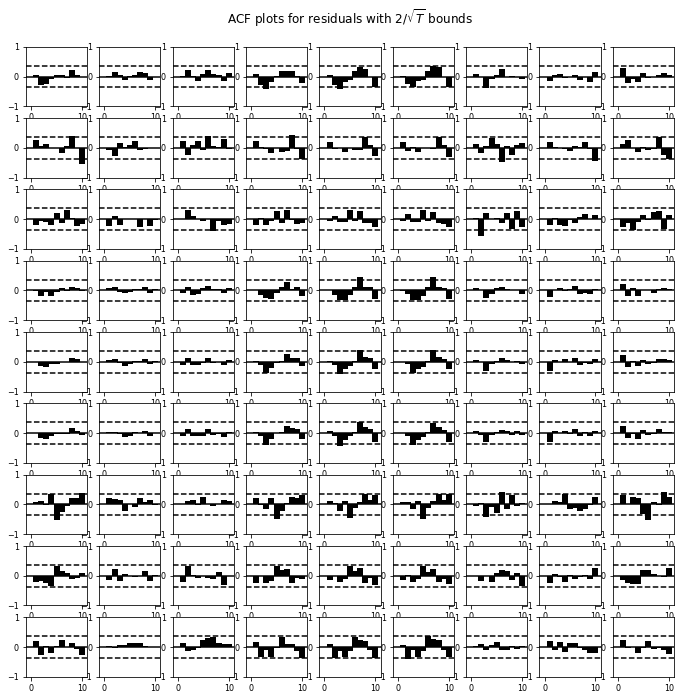

In [ ]:
res.plot_acorr(nlags=10, resid=True, linewidth=6)
plt.show()

### Model Prediction


In [ ]:
index = pd.date_range(start = '2014', periods = 8, freq= "AS")
index

DatetimeIndex(['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [ ]:
pred = res.forecast(train_diff2.values, steps=8)
df_forecast = pd.DataFrame(data = pred,columns = train_diff2.columns,index = ['2014','2015','2016','2017','2018','2019','2020','2021'])
df_forecast

,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,New_business_density,Manufacturing_value added_%_of_GDP
2014,603.127309,-5784.582444,28051.979911,9.181778e+10,187.289594,9.728345e+10,-4.251488,0.028336,4.643057
2015,-486.181898,363067.692499,2129.616704,-1.114710e+10,2.247400,3.474310e+10,6.387747,-0.005186,-0.198827
2016,-434.774428,104056.637089,-3752.442338,-3.826012e+10,-146.706702,-1.263419e+11,1.044098,-0.002922,-4.188617
2017,208.175757,411171.206902,-31646.491904,2.850526e+10,132.893010,1.132637e+11,-13.544493,0.004582,-2.123330
2018,365.015076,-611287.125487,38112.850438,-5.206774e+10,-174.460326,-1.251280e+11,9.307866,-0.002608,3.844499
2019,-31.879010,-175252.299662,9149.115352,9.125205e+10,250.753533,1.726265e+11,-4.628568,-0.015754,2.752607
2020,66.156656,362820.825506,-13690.986632,-1.784816e+10,-63.506476,-4.419371e+10,8.069627,0.035050,-3.391311
2021,-442.055920,523294.081368,19728.073055,-2.460738e+09,3.532009,3.258905e+10,-5.111623,-0.017447,-2.055019


In [ ]:
#invert result
test_obs = 8
def invert_second_diff(col_name, test_obs):
  df_forecast[col_name+"_1d"] = df[col_name].iloc[-test_obs-1] - df[col_name].iloc[-test_obs-2] +df_forecast[col_name].cumsum()
  df_forecast[col_name+"_forecasted"] = df[col_name].iloc[-test_obs-1] + df_forecast[col_name+"_1d"].cumsum()

# df_forecast['y_1d'] = df["Manufacturing_value added_%_of_GDP"].iloc[-test_obs-1] - df["Manufacturing_value added_%_of_GDP"].iloc[-test_obs-2] +df_forecast["Manufacturing_value added_%_of_GDP"].cumsum()
# df_forecast['y_forecast'] = df['Manufacturing_value added_%_of_GDP'].iloc[-test_obs-1] + df_forecast['Manufacturing_value added_%_of_GDP'].cumsum()

In [ ]:

for col_name in df_forecast.columns :
  invert_second_diff(col_name, test_obs)
df_forecast
            

,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,New_business_density,Manufacturing_value added_%_of_GDP,Air_freight_million_ton_km_1d,...,GDP_per_capita_current_USD_1d,GDP_per_capita_current_USD_forecasted,Final_consumption_1d,Final_consumption_forecasted,Access_finance_1d,Access_finance_forecasted,New_business_density_1d,New_business_density_forecasted,Manufacturing_value added_%_of_GDP_1d,Manufacturing_value added_%_of_GDP_forecasted
2014,603.127309,-5784.582444,28051.979911,9.181778e+10,187.289594,9.728345e+10,-4.251488,0.028336,4.643057,757.659150,...,193.017610,1642.628060,1.315937e+11,1.393068e+12,-4.251488,26.048512,0.012637,0.122597,4.079157,19.332179
2015,-486.181898,363067.692499,2129.616704,-1.114710e+10,2.247400,3.474310e+10,6.387747,-0.005186,-0.198827,271.477252,...,195.265010,1837.893070,1.663368e+11,1.559405e+12,2.136260,28.184772,0.007450,0.130047,3.880329,23.212509
2016,-434.774428,104056.637089,-3752.442338,-3.826012e+10,-146.706702,-1.263419e+11,1.044098,-0.002922,-4.188617,-163.297176,...,48.558307,1886.451378,3.999493e+10,1.599400e+12,3.180358,31.365130,0.004529,0.134576,-0.308288,22.904221
2017,208.175757,411171.206902,-31646.491904,2.850526e+10,132.893010,1.132637e+11,-13.544493,0.004582,-2.123330,44.878581,...,181.451317,2067.902695,1.532586e+11,1.752658e+12,-10.364135,21.000994,0.009110,0.143686,-2.431617,20.472604
2018,365.015076,-611287.125487,38112.850438,-5.206774e+10,-174.460326,-1.251280e+11,9.307866,-0.002608,3.844499,409.893657,...,6.990991,2074.893686,2.813054e+10,1.780789e+12,-1.056269,19.944725,0.006503,0.150189,1.412881,21.885485
2019,-31.879010,-175252.299662,9149.115352,9.125205e+10,250.753533,1.726265e+11,-4.628568,-0.015754,2.752607,378.014646,...,257.744524,2332.638210,2.007571e+11,1.981546e+12,-5.684837,14.259887,-0.009251,0.140938,4.165489,26.050973
2020,66.156656,362820.825506,-13690.986632,-1.784816e+10,-63.506476,-4.419371e+10,8.069627,0.035050,-3.391311,444.171303,...,194.238048,2526.876259,1.565634e+11,2.138109e+12,2.384790,16.644677,0.025798,0.166736,0.774178,26.825151
2021,-442.055920,523294.081368,19728.073055,-2.460738e+09,3.532009,3.258905e+10,-5.111623,-0.017447,-2.055019,2.115383,...,197.770057,2724.646316,1.891524e+11,2.327262e+12,-2.726833,13.917845,0.008351,0.175087,-1.280841,25.544310


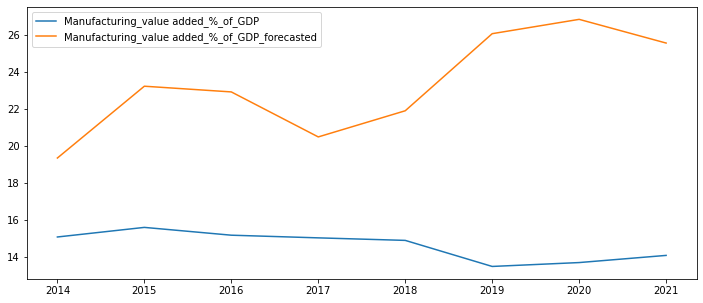

In [ ]:
# plot prediction
test_original = df[-test_obs:]
test_original.index =  ['2014','2015','2016','2017','2018','2019','2020','2021']
test_original['Manufacturing_value added_%_of_GDP'].plot(figsize=(12,5),legend=True)
df_forecast['Manufacturing_value added_%_of_GDP_forecasted'].plot(legend=True)
plt.show()

In [ ]:
#calculate RMSE
valid_res = test_original.drop(["Year","Logistic_performance"],axis= 1)
for col_name in valid_res.columns:
  print('RMSE value for', col_name, 'is:', sqrt(mean_squared_error(df_forecast[col_name+"_forecasted"], test_original[col_name])))

RMSE value for Air_freight_million_ton_km is: 1666.3010685223906
RMSE value for Container_port_traffic_TEU is: 1222790.521497734
RMSE value for Railways_goods_trans_million_ton-km is: 226668.68521533057
RMSE value for Industry_value_added_current_USD is: 163776759767.7487
RMSE value for GDP_per_capita_current_USD is: 299.21198888491097
RMSE value for Final_consumption is: 99325330551.28131
RMSE value for Access_finance is: 10.779118305969222
RMSE value for New_business_density is: 0.025883777666479563
RMSE value for Manufacturing_value added_%_of_GDP is: 9.20390277664804


## China

In [ ]:
df_chn = method_dict["NOCB"][0]

### Missing value imputation

In [ ]:
for j in df_chn.columns:
  df_chn[j] = df_chn[j].ffill()
df_chn

,Year,Logistic_performance,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,New_business_density,Manufacturing_value added_%_of_GDP
0,1980,3.320000,120.900002,4.100000e+07,1304950.0,9.186189e+10,194.804722,1.236532e+11,14.7,3.579166,31.975070
1,1981,3.320000,155.399994,4.100000e+07,1304950.0,9.004046e+10,197.071474,1.300873e+11,14.7,3.579166,31.975070
2,1982,3.320000,184.199997,4.100000e+07,1304950.0,9.151227e+10,203.334920,1.365207e+11,14.7,3.579166,31.975070
3,1983,3.320000,216.000000,4.100000e+07,1304950.0,1.020296e+11,225.431929,1.556016e+11,14.7,3.579166,31.975070
4,1984,3.320000,302.000000,4.100000e+07,1304950.0,1.115976e+11,250.713969,1.709516e+11,14.7,3.579166,31.975070
5,1985,3.320000,403.000000,4.100000e+07,1304950.0,1.321895e+11,294.458849,2.013865e+11,14.7,3.579166,31.975070
6,1986,3.320000,467.500000,4.100000e+07,1304950.0,1.308732e+11,281.928121,1.950963e+11,14.7,3.579166,31.975070
7,1987,3.320000,647.500000,4.100000e+07,1304950.0,1.182474e+11,251.811957,1.713794e+11,14.7,3.579166,31.975070
8,1988,3.320000,731.799988,4.100000e+07,1304950.0,1.359505e+11,283.537695,1.940199e+11,14.7,3.579166,31.975070
9,1989,3.320000,683.099976,4.100000e+07,1304950.0,1.477876e+11,310.881912,2.235563e+11,14.7,3.579166,31.975070


### Visualize time series

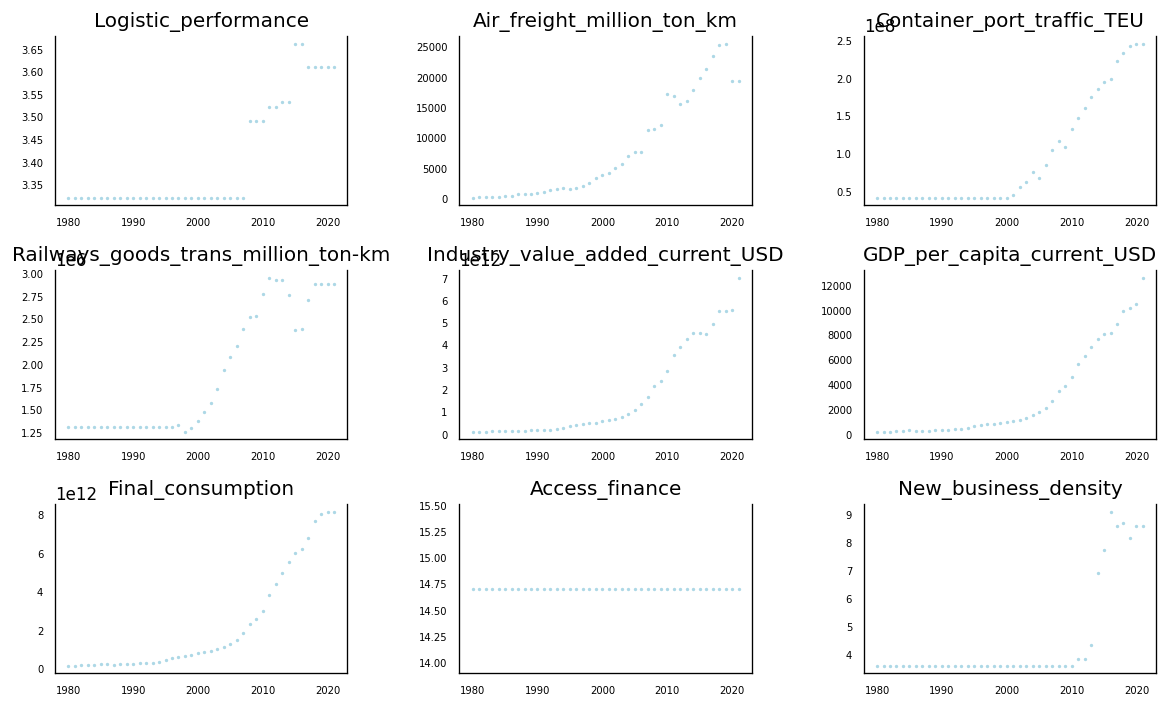

In [ ]:
plot_time_series(df_chn,3,3)

### ADF test

In [ ]:
df_test = df_chn.drop(["Year"], axis = 1)
for name, column in df_test.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Logistic_performance" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1954
 No. Lags Chosen       = 7
 Critical value 1%     = -3.639
 Critical value 5%     = -2.951
 Critical value 10%    = -2.614
 => P-Value = 0.6756. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Air_freight_million_ton_km" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1814
 No. Lags Chosen       = 10
 Critical value 1%     = -3.661
 Critical value 5%     = -2.961
 Critical value 10%    = -2.619
 => P-Value = 0.6816. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Container_port_traffic_TEU" 
    -----------------------------------------------
 

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


### Cointegration Test

In [ ]:
col = df_test.drop(['Manufacturing_value added_%_of_GDP'], axis = 1).columns


for col_name in col:
  test_res = coint(df_test['Manufacturing_value added_%_of_GDP'],df_test[col_name])
  print(f"{col_name}: \n  coint_t {test_res[0]} \n  p-value {test_res[1]}")
  if test_res[1] < 0.05:
    print(" false")
  else:
    print(" true")
  # print(coint(df_test['Manufacturing_value added_%_of_GDP'],df_test[col_name]))

Logistic_performance: 
  coint_t -3.856409019899889 
  p-value 0.011381191008028858
 false
Air_freight_million_ton_km: 
  coint_t 0.4136677910300968 
  p-value 0.9920053283592413
 true
Container_port_traffic_TEU: 
  coint_t -0.4610279345111947 
  p-value 0.9669931843101512
 true
Railways_goods_trans_million_ton-km: 
  coint_t 1.3882013776455058 
  p-value 1.0
 true
Industry_value_added_current_USD: 
  coint_t -0.44564056172564054 
  p-value 0.9679840283594237
 true
GDP_per_capita_current_USD: 
  coint_t -0.5937502401684988 
  p-value 0.9569472682981213
 true
Final_consumption: 
  coint_t -1.0024551248129936 
  p-value 0.9023806010765296
 true
Access_finance: 
  coint_t -0.6228798254985266 
  p-value 0.9543410822065335
 true
New_business_density: 
  coint_t 0.7111567371571802 
  p-value 0.9936428716370121
 true


### VAR model fitting

In [ ]:
df_test_train = df_test.drop(["Access_finance"],axis =1)
train_diff2, valid_diff2 = split_train_test(df_test_train, 0.8)

In [ ]:
# select the order of model
model = VAR(endog=train_diff2)


In [ ]:
res = model.fit(3,trend = "nc")
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 10, Oct, 2022
Time:                     01:41:04
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    95.7320
Nobs:                     30.0000    HQIC:                   88.0132
Log likelihood:          -1405.85    FPE:                1.31821e+41
AIC:                      84.3823    Det(Omega_mle):     4.08158e+38
--------------------------------------------------------------------
Results for equation Logistic_performance
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
L1.Logistic_performance                        0.114608         2.214583            0.052           0.959
L1.Air_freight_million_ton_km                  0.00

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/vector_ar/var_model.py:1450: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


### Redisual Checking for correlation

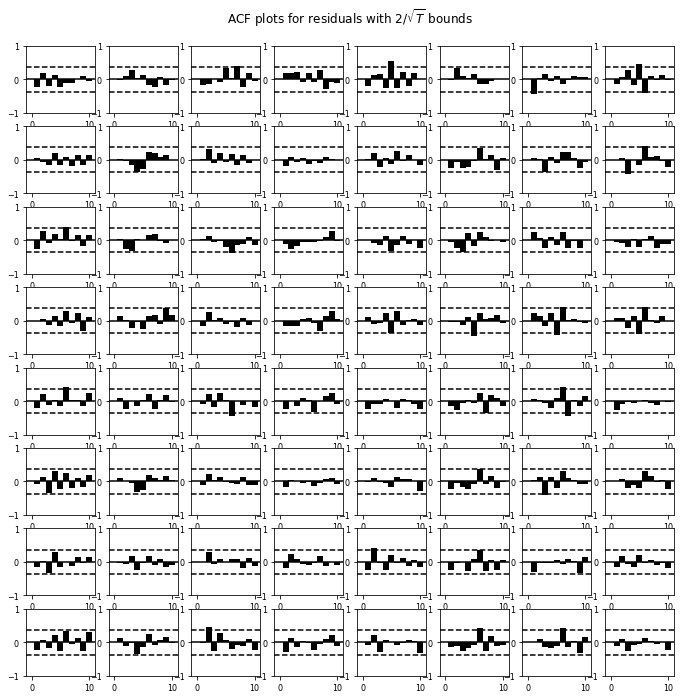

In [ ]:
res.plot_acorr(nlags=10, resid=True, linewidth=6)
plt.show()

### Model Prediction

In [ ]:
pred = res.forecast(train_diff2.values, steps=8)
df_forecast = pd.DataFrame(data = pred,columns = train_diff2.columns,index = ['2014','2015','2016','2017','2018','2019','2020','2021'])
df_forecast['Manufacturing_value added_%_of_GDP_forecasted'] = df_forecast['Manufacturing_value added_%_of_GDP']

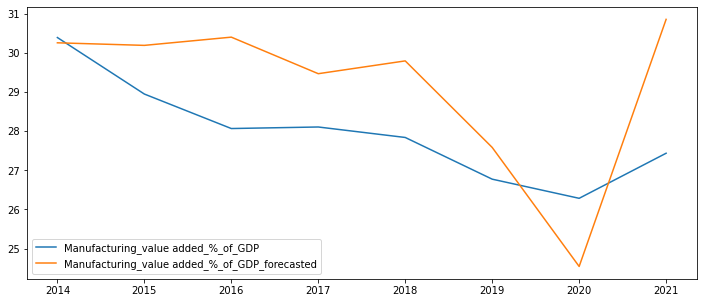

In [ ]:
# plot prediction
test_original = df_chn[-test_obs:]
test_original.index =  ['2014','2015','2016','2017','2018','2019','2020','2021']
test_original['Manufacturing_value added_%_of_GDP'].plot(figsize=(12,5),legend=True)
df_forecast['Manufacturing_value added_%_of_GDP_forecasted'].plot(legend=True)
plt.show()

In [ ]:
# df_forecast = df_forecast.drop(['Manufacturing_value added_%_of_GDP_forecasted'], axis = 1)
for col_name in df_forecast.columns:
  print('RMSE value for', col_name, 'is:', sqrt(mean_squared_error(df_forecast[col_name], test_original[col_name])))

RMSE value for Logistic_performance is: 0.9582197785548137
RMSE value for Air_freight_million_ton_km is: 61942.1979809645
RMSE value for Container_port_traffic_TEU is: 329449416.94174534
RMSE value for Railways_goods_trans_million_ton-km is: 6022591.411830926
RMSE value for Industry_value_added_current_USD is: 6477387447250.053
RMSE value for GDP_per_capita_current_USD is: 9154.158182471758
RMSE value for Final_consumption is: 5369173170236.966
RMSE value for New_business_density is: 4.248198404285219
RMSE value for Manufacturing_value added_%_of_GDP is: 1.875340032784703


## United States

Time range: 1980 - 2021
Since Access_finance and New_business_density are not reported in US data, we will discard these two variables.

In [ ]:
df_us = method_dict["NOCB"][7]

In [ ]:
df_us = df_us.drop(['Access_finance','New_business_density'], axis = 1)
df_us

,Year,Logistic_performance,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Manufacturing_value added_%_of_GDP
0,1980,3.840000,8615.400391,2.830000e+07,1922797.0,1.984169e+12,12574.791506,2.204317e+12,16.087177
1,1981,3.840000,8606.900391,2.830000e+07,1922797.0,1.984169e+12,13976.105393,2.440992e+12,16.087177
2,1982,3.840000,8295.799805,2.830000e+07,1922797.0,1.984169e+12,14433.787727,2.625786e+12,16.087177
3,1983,3.840000,9284.500000,2.830000e+07,1922797.0,1.984169e+12,15543.893717,2.876998e+12,16.087177
4,1984,3.840000,10293.099609,2.830000e+07,1922797.0,1.984169e+12,17121.225485,3.127068e+12,16.087177
5,1985,3.840000,9672.200195,2.830000e+07,1922797.0,1.984169e+12,18236.827727,3.403470e+12,16.087177
6,1986,3.840000,10619.000000,2.830000e+07,1922797.0,1.984169e+12,19071.227195,3.624267e+12,16.087177
7,1987,3.840000,12023.200195,2.830000e+07,1922797.0,1.984169e+12,20038.941099,3.853172e+12,16.087177
8,1988,3.840000,13875.599609,2.830000e+07,1922797.0,1.984169e+12,21417.011931,4.150467e+12,16.087177
9,1989,3.840000,14651.000000,2.830000e+07,1922797.0,1.984169e+12,22857.154433,4.458186e+12,16.087177


### Missing value imputation


In [ ]:
for j in df_us.columns:
  df_us[j] = df_us[j].ffill()
df_us

,Year,Logistic_performance,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Manufacturing_value added_%_of_GDP
0,1980,3.840000,8615.400391,2.830000e+07,1922797.0,1.984169e+12,12574.791506,2.204317e+12,16.087177
1,1981,3.840000,8606.900391,2.830000e+07,1922797.0,1.984169e+12,13976.105393,2.440992e+12,16.087177
2,1982,3.840000,8295.799805,2.830000e+07,1922797.0,1.984169e+12,14433.787727,2.625786e+12,16.087177
3,1983,3.840000,9284.500000,2.830000e+07,1922797.0,1.984169e+12,15543.893717,2.876998e+12,16.087177
4,1984,3.840000,10293.099609,2.830000e+07,1922797.0,1.984169e+12,17121.225485,3.127068e+12,16.087177
5,1985,3.840000,9672.200195,2.830000e+07,1922797.0,1.984169e+12,18236.827727,3.403470e+12,16.087177
6,1986,3.840000,10619.000000,2.830000e+07,1922797.0,1.984169e+12,19071.227195,3.624267e+12,16.087177
7,1987,3.840000,12023.200195,2.830000e+07,1922797.0,1.984169e+12,20038.941099,3.853172e+12,16.087177
8,1988,3.840000,13875.599609,2.830000e+07,1922797.0,1.984169e+12,21417.011931,4.150467e+12,16.087177
9,1989,3.840000,14651.000000,2.830000e+07,1922797.0,1.984169e+12,22857.154433,4.458186e+12,16.087177


### Visualize time series

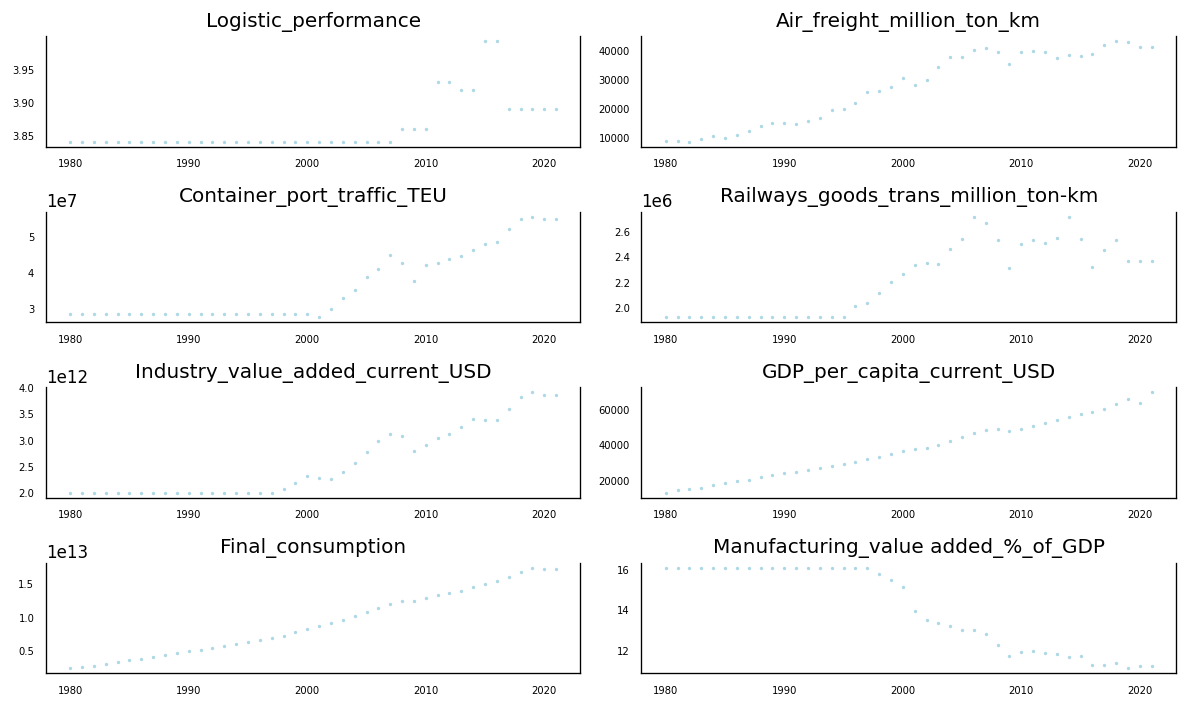

In [ ]:
plot_time_series(df_us,4,2)

### ADF test

In [ ]:
df_test = df_us.drop(["Year"], axis = 1)
for name, column in df_test.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Logistic_performance" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4139
 No. Lags Chosen       = 10
 Critical value 1%     = -3.661
 Critical value 5%     = -2.961
 Critical value 10%    = -2.619
 => P-Value = 0.0003. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Air_freight_million_ton_km" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0108
 No. Lags Chosen       = 0
 Critical value 1%     = -3.601
 Critical value 5%     = -2.935
 Critical value 10%    = -2.606
 => P-Value = 0.7493. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Container_port_traffic_TEU" 
    -----------------------------------------------
 Null Hyp

In [ ]:
df_diff = df_test.diff().dropna()
# df_diff
# df_diff_2 = df_diff.diff().dropna()
# # df_diff_2

In [ ]:
for name, column in df_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Logistic_performance" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2658
 No. Lags Chosen       = 10
 Critical value 1%     = -3.67
 Critical value 5%     = -2.964
 Critical value 10%    = -2.621
 => P-Value = 0.1832. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Air_freight_million_ton_km" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.977
 No. Lags Chosen       = 0
 Critical value 1%     = -3.606
 Critical value 5%     = -2.937
 Critical value 10%    = -2.607
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Container_port_traffic_TEU" 
    -----------------------------------------------
 Null Hypothes

### Cointegration Test

In [ ]:
col = df_test.drop(['Manufacturing_value added_%_of_GDP'], axis = 1).columns

for col_name in col:
  test_res = coint(df_test['Manufacturing_value added_%_of_GDP'],df_test[col_name])
  print(f"{col_name}: \n  coint_t {test_res[0]} \n  p-value {test_res[1]}")
  if test_res[1] < 0.05:
    print(" false")
  else:
    print(" true")
  # print(coint(df_test['Manufacturing_value added_%_of_GDP'],df_test[col_name]))

Logistic_performance: 
  coint_t -1.8036581848322464 
  p-value 0.6279435039375525
 true
Air_freight_million_ton_km: 
  coint_t -1.8349471701488225 
  p-value 0.6125969473334288
 true
Container_port_traffic_TEU: 
  coint_t -1.8785863886005898 
  p-value 0.5908268006500361
 true
Railways_goods_trans_million_ton-km: 
  coint_t -0.7197647716244876 
  p-value 0.9444632177964746
 true
Industry_value_added_current_USD: 
  coint_t -1.4362099179847716 
  p-value 0.7848322571428072
 true
GDP_per_capita_current_USD: 
  coint_t -1.8767501873537529 
  p-value 0.5917506451731409
 true
Final_consumption: 
  coint_t -2.229567922947517 
  p-value 0.4091724606102306
 true


### VAR model fitting

In [ ]:
train_diff, valid_diff = split_train_test(df_diff, 0.8)
# select the order of model
model = VAR(endog=train_diff)
lag_order = model.select_order()
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       162.9       163.2   5.350e+70       163.0
1       160.0       163.4   3.573e+69       161.1
2      151.2*      157.5*  1.506e+66*      153.2*
-------------------------------------------------


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
# fit model
res = model.fit(2)
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 10, Oct, 2022
Time:                     01:41:51
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    157.517
Nobs:                     30.0000    HQIC:                   153.197
Log likelihood:          -2472.02    FPE:                1.50569e+66
AIC:                      151.165    Det(Omega_mle):     4.14880e+64
--------------------------------------------------------------------
Results for equation Logistic_performance
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                         -0.015071         0.007095           -2.124           0.034
L1.Logistic_performance                        0.57

### Residual Checking for correlation

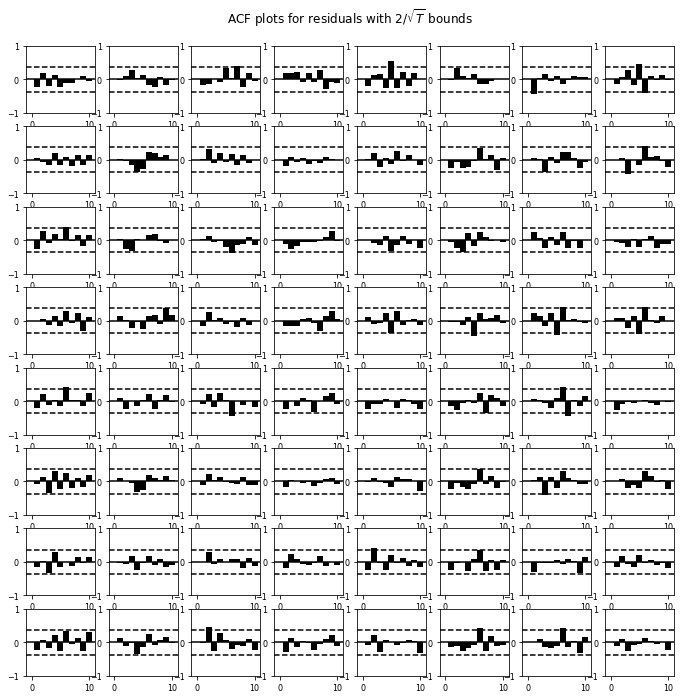

In [ ]:
res.plot_acorr(nlags=10, resid=True, linewidth=6)
plt.show()

### Model Prediction

In [ ]:
pred = res.forecast(train_diff.values, steps=8)
df_forecast = pd.DataFrame(data = pred,columns = train_diff.columns,index = ['2014','2015','2016','2017','2018','2019','2020','2021'])
df_forecast

,Logistic_performance,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Manufacturing_value added_%_of_GDP
2014,0.047353,19591.482064,3.141206e+07,1.103730e+06,2.001374e+12,12495.274606,3.005425e+12,1.885556
2015,0.246903,-15485.061328,6.485339e+06,5.921597e+05,1.497153e+12,7219.821621,2.644478e+12,-1.855502
2016,0.051396,-10625.859537,2.555695e+07,2.777855e+05,1.524211e+12,8657.841765,2.962986e+12,-1.947832
2017,0.357416,42875.847276,1.070523e+08,3.198820e+06,6.955946e+12,36296.386460,1.055536e+13,3.214435
2018,0.918958,-67789.339158,3.444688e+07,1.269946e+06,5.194660e+12,18620.465565,8.806574e+12,-7.380125
2019,0.469447,-7674.731023,1.625728e+08,2.940064e+06,9.616711e+12,48351.474514,1.548364e+13,-1.960147
2020,1.941754,108620.703135,4.090300e+08,1.233127e+07,2.832463e+13,140435.642384,4.188246e+13,10.574016
2021,3.633192,-232384.669718,2.576483e+08,7.472623e+06,2.675791e+13,107705.741378,4.259509e+13,-22.480426


In [ ]:
#invert result
test_obs = 8
def invert_first_diff(col_name, test_obs):
  df_forecast[col_name+"_forecasted"] = df_us[col_name].iloc[-test_obs-1] + df_forecast[col_name].cumsum()


In [ ]:
for col_name in df_forecast.columns :
  invert_first_diff(col_name, test_obs)
df_forecast

,Logistic_performance,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Manufacturing_value added_%_of_GDP,Logistic_performance_forecasted,Air_freight_million_ton_km_forecasted,Container_port_traffic_TEU_forecasted,Railways_goods_trans_million_ton-km_forecasted,Industry_value_added_current_USD_forecasted,GDP_per_capita_current_USD_forecasted,Final_consumption_forecasted,Manufacturing_value added_%_of_GDP_forecasted
2014,0.047353,19591.482064,3.141206e+07,1.103730e+06,2.001374e+12,12495.274606,3.005425e+12,1.885556,3.965178,56705.040986,7.575292e+07,3.645085e+06,5.242277e+12,65786.402296,1.690160e+13,13.683673
2015,0.246903,-15485.061328,6.485339e+06,5.921597e+05,1.497153e+12,7219.821621,2.644478e+12,-1.855502,4.212081,41219.979657,8.223826e+07,4.237245e+06,6.739431e+12,73006.223916,1.954608e+13,11.828171
2016,0.051396,-10625.859537,2.555695e+07,2.777855e+05,1.524211e+12,8657.841765,2.962986e+12,-1.947832,4.263477,30594.120121,1.077952e+08,4.515030e+06,8.263641e+12,81664.065681,2.250906e+13,9.880339
2017,0.357416,42875.847276,1.070523e+08,3.198820e+06,6.955946e+12,36296.386460,1.055536e+13,3.214435,4.620893,73469.967397,2.148476e+08,7.713850e+06,1.521959e+13,117960.452142,3.306442e+13,13.094774
2018,0.918958,-67789.339158,3.444688e+07,1.269946e+06,5.194660e+12,18620.465565,8.806574e+12,-7.380125,5.539851,5680.628239,2.492944e+08,8.983796e+06,2.041425e+13,136580.917707,4.187100e+13,5.714649
2019,0.469447,-7674.731023,1.625728e+08,2.940064e+06,9.616711e+12,48351.474514,1.548364e+13,-1.960147,6.009298,-1994.102784,4.118673e+08,1.192386e+07,3.003096e+13,184932.392221,5.735463e+13,3.754502
2020,1.941754,108620.703135,4.090300e+08,1.233127e+07,2.832463e+13,140435.642384,4.188246e+13,10.574016,7.951053,106626.600352,8.208972e+08,2.425513e+07,5.835559e+13,325368.034605,9.923709e+13,14.328518
2021,3.633192,-232384.669718,2.576483e+08,7.472623e+06,2.675791e+13,107705.741378,4.259509e+13,-22.480426,11.584244,-125758.069366,1.078546e+09,3.172775e+07,8.511350e+13,433073.775982,1.418322e+14,-8.151907


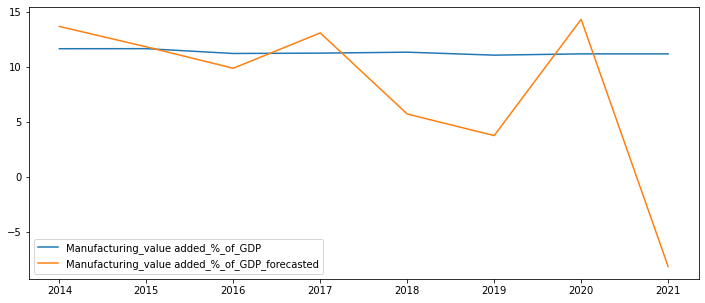

In [ ]:
# plot prediction
test_original = df_us[-test_obs:]
test_original.index =  ['2014','2015','2016','2017','2018','2019','2020','2021']
test_original['Manufacturing_value added_%_of_GDP'].plot(figsize=(12,5),legend=True)
df_forecast['Manufacturing_value added_%_of_GDP_forecasted'].plot(legend=True)
plt.show()

In [ ]:
test_original

,Year,Logistic_performance,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,Access_finance,New_business_density,Manufacturing_value added_%_of_GDP
2014,2014,3.531463,17822.5810,185136300.0,2753020.0,4.513507e+12,7636.116601,5.502346e+12,14.7,6.890606,30.396444
2015,2015,3.661104,19805.6300,193734000.0,2375430.0,4.517686e+12,8016.431435,5.972231e+12,14.7,7.706354,28.951671
2016,2016,3.661104,21304.5851,197849000.0,2379230.0,4.446201e+12,8094.363367,6.182654e+12,14.7,9.081590,28.069442
2017,2017,3.610000,23323.6147,222155820.0,2696220.0,4.905907e+12,8816.986905,6.754427e+12,14.7,8.578018,28.108937
2018,2018,3.610000,25256.2071,233201600.0,2882100.0,5.514438e+12,9905.342004,7.650165e+12,14.7,8.669261,27.841011
2019,2019,3.610000,25394.5878,242030000.0,2882100.0,5.510257e+12,10143.838196,7.999417e+12,14.7,8.153256,26.774722
2020,2020,3.610000,19264.2436,245103781.0,2882100.0,5.558225e+12,10408.669756,8.126755e+12,14.7,8.583741,26.285189
2021,2021,3.610000,19264.2436,245103781.0,2882100.0,6.991844e+12,12556.333120,8.126755e+12,14.7,8.583741,27.437730


In [ ]:
#calculate RMSE
valid_res = test_original.drop(["Year","Logistic_performance","Access_finance","New_business_density"],axis= 1)
for col_name in valid_res.columns:
  print('RMSE value for', col_name, 'is:', sqrt(mean_squared_error(df_forecast[col_name+"_forecasted"], test_original[col_name])))

RMSE value for Air_freight_million_ton_km is: 65544.22982836227
RMSE value for Container_port_traffic_TEU is: 368752302.3446113
RMSE value for Railways_goods_trans_million_ton-km is: 13425081.067826567
RMSE value for Industry_value_added_current_USD is: 35071774548106.902
RMSE value for GDP_per_capita_current_USD is: 208435.23793713114
RMSE value for Final_consumption is: 62307901111414.91
RMSE value for Manufacturing_value added_%_of_GDP is: 21.08877131626725
